In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

# Mission1. Netflix and Code

In [2]:
netflix = pd.read_csv('./netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Mandatory Part

### 한국 작품은 총 얼마나 있는가?

In [3]:
netflix[netflix['country'] == 'South Korea']['show_id'].count()

183

## Bonus Part

### 가장 많은 작품이 올라온 국가는 어디이고, 얼마나 많은 작품이 있는가?

In [4]:
netflix_country = netflix.groupby('country')['show_id'].count().reset_index(name='show_count')
netflix_country.head()

,country,show_count
0,Argentina,50
1,"Argentina, Brazil, France, Poland, Germany, De...",1
2,"Argentina, Chile",1
3,"Argentina, Chile, Peru",1
4,"Argentina, France",1


In [5]:
netflix_country[netflix_country['show_count'] == netflix_country['show_count'].max()]

,country,show_count
549,United States,2555


# Mission 2. 가즈아!

In [6]:
bitcoin = pd.read_csv('./BitCoin.csv')
bitcoin.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


## Mandatory Part

###  2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

In [7]:
year_bc = bitcoin[('2016-06' <= bitcoin['Date']) & (bitcoin['Date'] < '2017-07')]
year_bc = year_bc.sort_values(by='Date')
year_bc.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
625,625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000
594,594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000
565,565,2016-06-03,400.52,411.91,395.78,407.71,91212500.0,6121400000
534,534,2016-06-04,424.28,424.53,422.73,423.41,59091000.0,6533260000
504,504,2016-06-05,447.94,461.38,447.07,459.60,72796800.0,6947800000


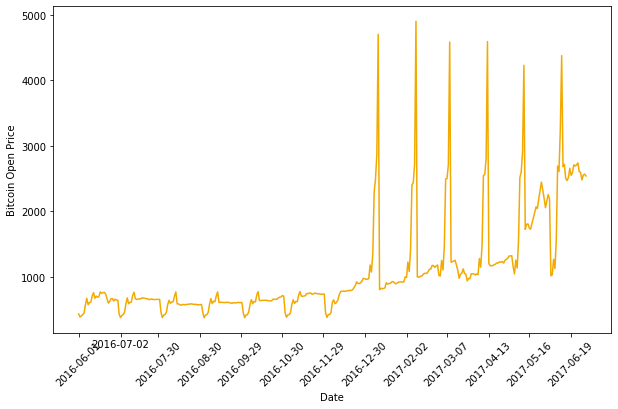

In [8]:
plt.figure(figsize=(10,6))
plt.title('Bitcoin Open Price 2016.6-2017.', fontsize=15)

plt.xlabel('Date')
plt.ylabel('Bitcoin Open Price')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.plot(year_bc['Date'], year_bc['Open'], color='#f2a900')

plt.show()

## Bonus Part

### 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

In [9]:
ethereum = pd.read_csv('ETH_day.csv')
ethereum.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [10]:
year_eth = ethereum[('2016-06' <= ethereum['Date']) & (ethereum['Date'] < '2017-07')]
year_eth = year_eth.sort_values(by='Date')
year_eth.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67


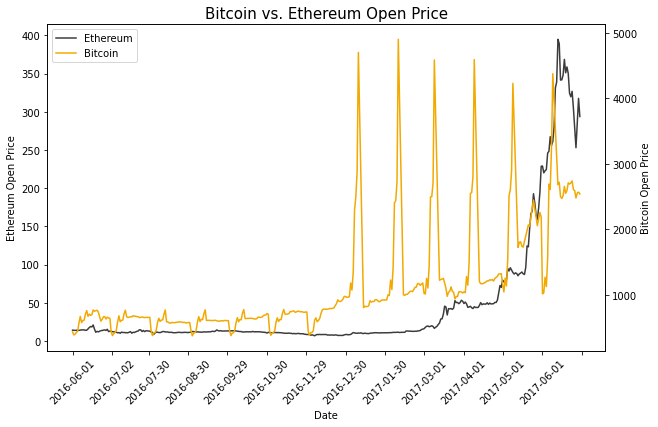

In [11]:
plt.figure(figsize=(10,6))
plt.title('Bitcoin vs. Ethereum Open Price', fontsize=15)
plt.xticks(rotation=45)

ax1 = plt.subplot(111)
ax2 = ax1.twinx()

a1, = ax1.plot(year_eth['Date'], year_eth['Open'], color='#3c3c3d', label='Ethereum')
a2, = ax2.plot(year_bc['Date'], year_bc['Open'], color='#f2a900', label='Bitcoin')

p = [a1, a2]
ax1.legend(p, [p1.get_label() for p1 in p], loc='upper left')


ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.set_xlabel('Date')
ax1.set_ylabel('Ethereum Open Price')
ax2.set_ylabel('Bitcoin Open Price')


plt.show()

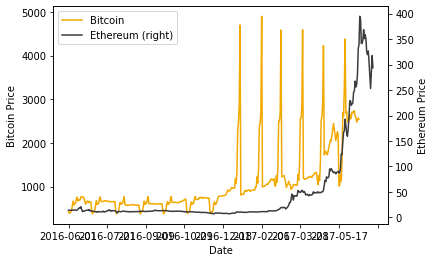

In [12]:
ax1 = year_bc.plot(kind='line', x='Date', y='Open', color='#f2a900', label='Bitcoin')
ax2 = year_eth.plot(kind='line', x='Date', y='Open', color='#3c3c3d', ax=ax1, secondary_y=True, label='Ethereum')

ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price')
ax2.set_ylabel('Ethereum Price')


plt.show()